# IPL Score Prediction using Deep Learning

### Step 1: First, let’s import all the necessary libraries:

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

### Step 2: Loading the dataset!
When dealing with cricket data, it contains data from the year 2008 to 2017. The dataset contain features like venue, date, batting and bowling team, names of batsman and bowler, wickets and more. The dataset can be downloaded from here -> https://media.geeksforgeeks.org/wp-content/uploads/20250122152410918077/ipl_data.csv

We imported the dataset using .read_csv() method into a dataframe using pandas and displayed the first 5 rows of each dataset

In [23]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Step 3: Data Pre-processing

##### 3.1 Dropping unimportant features

- We have created a new dataframe by dropping several columns from the original DataFrame.
- The new DataFrame contains the remaining columns that we are going to train the predictive model.

In [24]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

##### 3.2 Further Pre-Processing

- We have split the data frame into independent variable (X) and dependent variables (y). Our dependent variables is the total score.

In [26]:
X = df.drop(['total'], axis =1)
y = df['total']

In [30]:
X

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201
...,...,...,...,...,...
76009,23,7,10,172,96
76010,23,7,10,172,96
76011,23,7,10,172,96
76012,23,7,10,215,96


##### 3.3 Label Encoding

- We have applied label encoding to your categorical features in X.
- We have created separate LabelEncoder objects for each categorical feature and encoded their values.
- We have created mappings to convert the encoded labels back to their original values, which can be helpful for interpreting the results.

In [27]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

##### 3.4 Train Test Split

- We have split the data into training and testing sets. The training set contains 70 percent of the dataset and rest 30 percent is in test set.
    - X_train contains the training data for your input features.
    - X_test contains the testing data for your input features.
    - y_train contains the training data for your target variable.
    - y_test contains the testing data for your target variable.

In [31]:
# Train test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### 3.5 Feature Scaling

- We have performed Min-Max scaling on our input features to ensure all the features are on the same scale
- Scaling is performed to ensure consistent scale to improve model performance.
- Scaling has transformed both training and testing data using the scaling parameters.

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 4: Define the Neural Network
We have defined a neural network using TensorFlow and Keras for regression.
After defining the model, we have compiled the model using the Huber Loss because of the robustness of the regression against outliers.

In [33]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

### Step 5: Model Training
- We have trained the neural network model using the scaled training data.

In [34]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 54.5062 - val_loss: 22.1902
Epoch 2/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.4349 - val_loss: 22.5486
Epoch 3/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 22.3424 - val_loss: 21.9615
Epoch 4/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - loss: 22.3030 - val_loss: 21.9271
Epoch 5/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 22.0119 - val_loss: 22.3524
Epoch 6/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 22.1178 - val_loss: 22.2253
Epoch 7/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 22.3036 - val_loss: 21.9592
Epoch 8/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 22.1805 - val_loss: 21.8663
Epoch 9/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 22.1343 - val_loss: 21.8214
Epoch 10/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 22.0810 - val_loss: 21.8351
Epoch 11/50
832/832 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 22.0346 - val_loss: 21.7897
Epoch 12/50
832/832 ━━

- After the training, we have stored the training and validation loss values to our neural network during the training process.

<Axes: >

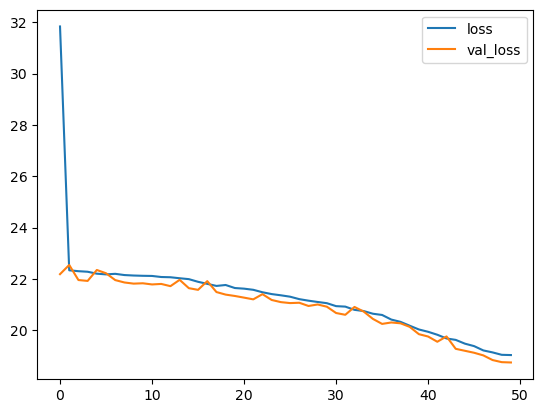

In [35]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

### Step 6: Model Evaluation
- We have predicted using the trained neural network on the testing data.
- The variable predictions contains the predicted total run scores for the test set based on the model’s learned patterns.

In [36]:
# Make predictions
predictions = model.predict(X_test_scaled)


# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 19.24
MSE: 692.21
RMSE: 26.31
R² Score: 0.1792


### Step 7: Let’s create an Interactive Widget
- We have created an interactive widget using ipywidgets to predict the score based on user input for venue, batting team, bowling team, striker, and bowler.
- We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.
- Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:
    - Decodes the user-selected values to their original categorical values.
    - Encodes and scales these values to match the format used in model training.
    - Uses the trained model to make a prediction based on the user’s input.
    - Displays the predicted score.

In [37]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output
        

        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print("Predicted Score: ", predicted_score)

The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.

In [38]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [39]:
import joblib

# Save model
joblib.dump(model, 'models\model.pkl')

# Save scaler
joblib.dump(scaler, 'models\scaler.pkl')

# Save encoders (assuming you have one for each column)
joblib.dump(venue_encoder, 'models\\venue_encoder.pkl')
joblib.dump(batting_team_encoder, 'models\\batting_team_encoder.pkl')
joblib.dump(bowling_team_encoder, 'models\\bowling_team_encoder.pkl')
joblib.dump(striker_encoder, 'models\\striker_encoder.pkl')
joblib.dump(bowler_encoder, 'models\\bowler_encoder.pkl')

['models\\bowler_encoder.pkl']

In [40]:
# Optional: Save only unique values for UI dropdowns
dropdown_data = {
    'venues': df['venue'].unique().tolist(),
    'batting_teams': df['bat_team'].unique().tolist(),
    'bowling_teams': df['bowl_team'].unique().tolist(),
    'strikers': df['batsman'].unique().tolist(),
    'bowlers': df['bowler'].unique().tolist()
}

joblib.dump(dropdown_data, 'models\\dropdown_data.pkl')

['models\\dropdown_data.pkl']